# Gradient Descent

gradient descent 방법을 적용하여 다음 함수의 최저점을 구하여라.
$$ f(x) = \frac{1}{2}x^4 -3 x^3 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
X= np.arange(-10,10,0.01)
def f(x):
    return 0.5*x**4 - 3*x**3

In [3]:
def get_derivative(f,x): 
    d=0.0001
    return (f(x+d)-f(x-d))/(2*d)
    
    

In [4]:
eta=0.01 
def GD(initial_x):
    x_old=initial_x
    x_new = initial_x
    history=[initial_x]
    while True:
        x_new=x_new-eta*get_derivative(f,x_new)
        history.append(x_new)
        if abs(x_new-x_old)<0.000001:
            break
        x_old=x_new
        
    return history

In [5]:
left=GD(-3)
print(len(left))
right=GD(6)
print(len(right))

3310
26


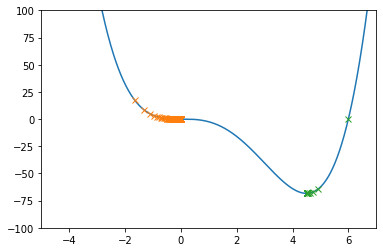

In [6]:
fig, ax=plt.subplots()
ax.axis([-5,7,-100,100])
ax.plot(X, [f(x) for x in X])
ax.plot(left,[f(x) for x in left],'x')
ax.plot(right,[f(x) for x in right],'x')
plt.show()

# Diabetes (regression)
다음의 당뇨 데이터를 회귀 분석하여라. 나이, BMI, 혈압, Y (당뇨병 진행 정도) 데이터를 이용하여라.
1. sklearn을 이용하지 않고 (자신의 코드로)
2. sklearn을 이용해서

In [7]:
from sklearn import datasets

In [8]:
diabetes=datasets.load_diabetes()

In [9]:
X_age=diabetes.data[:,0] # 나이 
X_bmi=diabetes.data[:,2] # BMI 
X_p=diabetes.data[:,3] # 혈압 
Y = diabetes.target/346

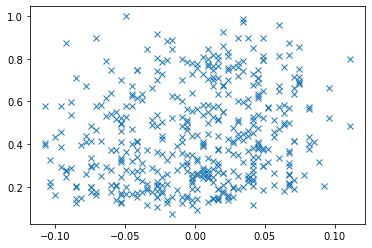

In [36]:
plt.plot(X_age,Y,'x')

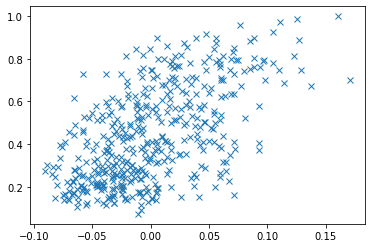

In [31]:
plt.plot(X_bmi,Y,'x')

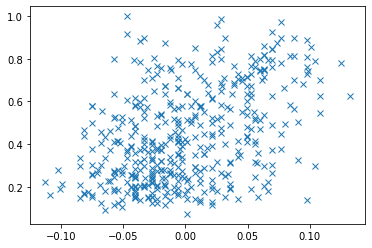

In [32]:
plt.plot(X_p,Y,'x')

# 선형성을 가정

In [10]:
X=np.stack((np.ones(442),X_age, X_bmi, X_p)).transpose()
#X_train, X_test=np.split(X, [380])

In [11]:
def MSE(X,Y,weight):
    N=len(X)
    error=Y-np.dot(X,weight)
    return np.linalg.norm(error)**2/N
    

In [15]:
def get_best_weight(X,Y): 
    """MSE함수의 그래디언트가 0이 되게 하는 weight을 풀어 함수 정의"""
    a=np.linalg.inv(np.dot(X.transpose(),X))
    
    return np.dot(np.dot(a,X.transpose()),Y)

In [19]:
weight=get_best_weight(X,Y)
"""get_best_weight함수로 얻은 weight의 MSE가 매우 작으므로 local minimum임을 알 수 있다"""
print(MSE(X,Y,weight)) 


0.029906894671542093


In [20]:
print(weight)

[0.43969215 0.07511831 2.2797128  1.13909724]


In [22]:
import sklearn.linear_model as sk

In [23]:
mlr = sk.LinearRegression()
mlr.fit(X,Y) 
print(mlr.coef_)

[0.         0.07511831 2.2797128  1.13909724]
